## Importing Libraries & Dataset

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [27]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## EDA

In [28]:
df.shape

(100000, 9)

In [29]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [30]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [31]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [32]:
df.groupby('gender')['diabetes'].sum()

gender
Female    4461
Male      4039
Other        0
Name: diabetes, dtype: int64

In [33]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [34]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

## Visualizating Data

 **Setting Graph style**

In [35]:
sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

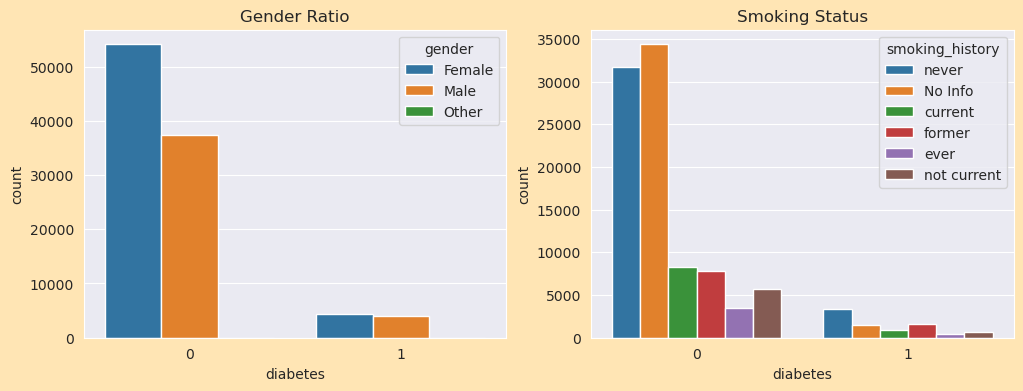

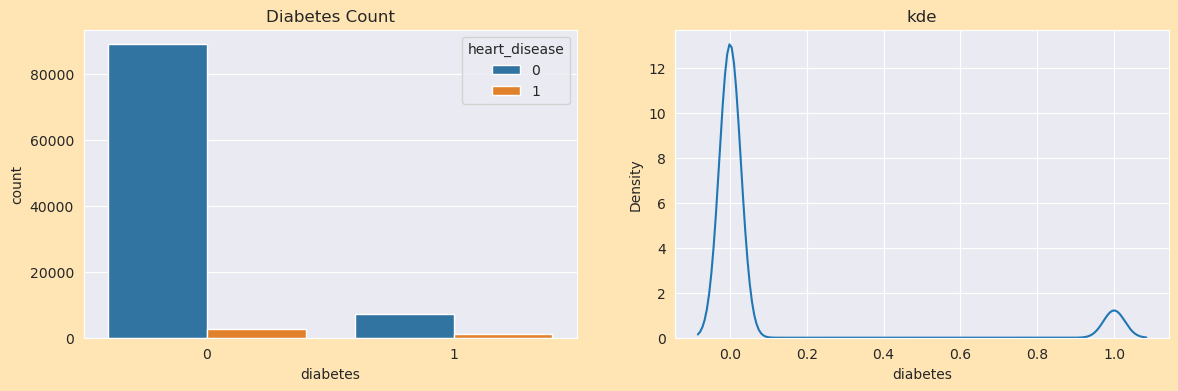

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="gender")
plt.title('Gender Ratio')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="smoking_history")
plt.title('Smoking Status')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="heart_disease")
plt.title('Diabetes Count')

plt.subplot(122)
sns.kdeplot(df['diabetes'])
plt.title('kde')

plt.show()

/tmp/ipykernel_32/2729784356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGn")


<Axes: >

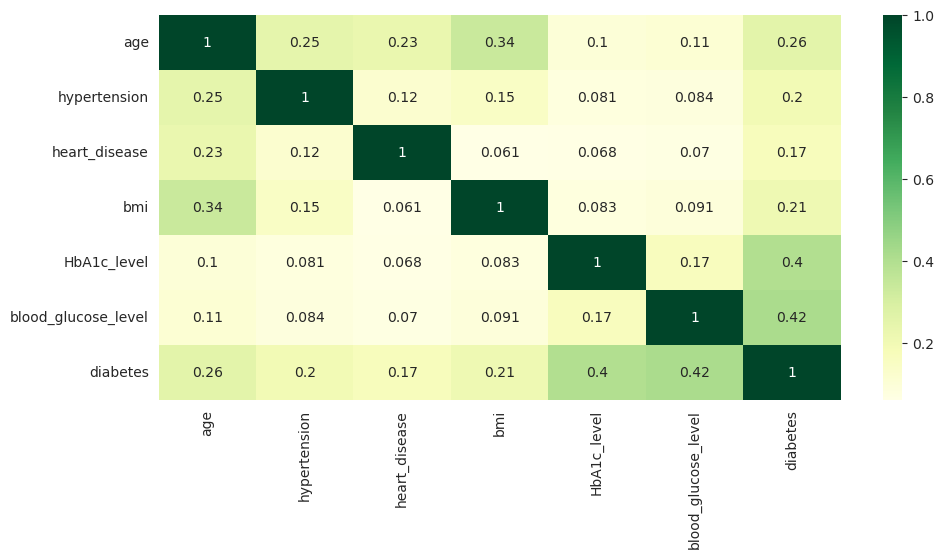

In [37]:
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['figure.facecolor'] = '#FFFFFF'
sns.heatmap(df.corr(), annot=True, cmap="YlGn")

## Importing Machine Learning Libabries

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [39]:
df['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
df['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Logistic Regression**

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

In [45]:
# predicating 
y_predLR = log_reg.predict(X_test)

In [46]:
# Confusion Metrix
metrics.confusion_matrix(y_test, y_predLR)

array([[18115,   182],
       [  607,  1096]])

In [47]:
accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)

# **Naive Bayes**

In [48]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)

# **K-Nearest Neighbor**

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)


# **accuracies**

In [50]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Naive Bayes Accuracy:", accuracy_nb)
print("KNN Accuracy:", accuracy_knn)

Logistic Regression Accuracy: 0.96055
Naive Bayes Accuracy: 0.9025
KNN Accuracy: 0.96205


In [ ]:
#acc_LR = metrics.accuracy_score(y_test, y_predLR)
#acc_LR

In [ ]:
print(metrics.classification_report(y_test, y_predLR))

In [ ]:
#fpr, tpr, thres = metrics.roc_curve(y_test, y_predLR)
#metrics.roc_auc_score(y_test, y_predLR)

In [ ]:
#plt.figure(figsize=(6,4))
#plt.plot(fpr, tpr)
#plt.title("ROC Curve")
#plt.xlabel("fpr")
#plt.ylabel("tpr")